# Сборный проект - 1


**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

##  Откройте файл с данными и изучите общую информацию
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру) ###

In [5]:
games.columns = [x.lower() for x in games.columns]

In [6]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему ###

Преобразуем столбец **user_score** в float. Поскольку игроки выставляютт оценки от 0 до 10.

In [7]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce', downcast='float')

**tbd** - to be decided, to be determined (будет установлено), в этих строчках данные еще не были определены. Для работы с датафреймом заменим tbd на NaN.

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.3+ MB


In [9]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработайте пропуски при необходимости: ###
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; 
- Опишите причины, которые могли привести к пропускам; 

In [10]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Удалим строки с пустым значением в столбце **name**:

In [11]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
games = games.dropna(subset=['name'])

In [13]:
for i in games.columns:
    print(i ,games[i].unique())

name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
platform ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
year_of_release [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
genre ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
na_sales [4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.

In [14]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
pd.set_option('display.max_rows', None)


Удалим пустые строки с пустыми значениями в столбце **year_of_release**, для анализа у нас их использовать все равно не получится. + изменим тип на int

In [16]:
games = games.dropna(subset=['year_of_release'])
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce', downcast='integer')

In [17]:
games_duplicates =  games[games.duplicated(['name', 'platform','year_of_release'])]

In [18]:
games_duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Заменим NaN значения в столце **rating** на **no_ESRB** (нет рейтинга ESRB):

In [20]:
games['rating'] = games['rating'].fillna(value = 'no_ESRB')

Посчитаем суммарные продажи во все регионах и запишем их в отдельный столбец:

In [21]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

В итоге:

- преобразовали столбец **user_score** в float;
- удвлили пустые значения в стоблцах **name**, **genre** (оказались в одних и тех же строчках);
- заполнниои некотроые пустые значения в столбце **year_of_release**  и преобразовали в int, пустые строки удалили, поскольку по играм без года никаких выводов сделать невозможно;
- посчитали суммарные продажи в регионаз и записали их в отдельный столбец;
- пустые значения в столбцах **user_score** и **critics_score** оставим как есть, их мы не можем заполнить;
- пустые значения в столбце **rating** заменили на RP ("Рейтинг ожидается")

Возможные причины появления пропусков в данных:
- **year_of_release** мог присутствовать человеческий фактор, поскольку не у большого количества игр пропущен год выпуска;
- **critic_score** возможно на этапе становления популярности компьютерных игр не было нужды в высталении оценок, а в 2016 году возможно еще не все критики выставили свои оценки, тоже самое и для **user_score**
- **rating**, во-первых ESRB была основана в 1994, поэтому в играх выпущенных ранее его нет; во-вторых этот рейтинг для США и Канады. 

## Проведите исследовательский анализ данных ##

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

###  Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? ###

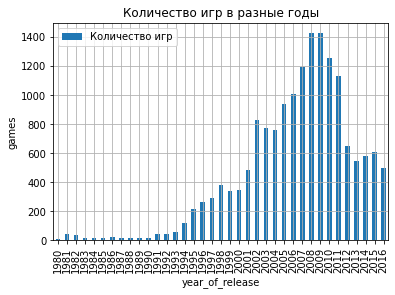

In [23]:
games.groupby('year_of_release')['name'].count().plot(kind='bar', title = 'Количество игр в разные годы', legend = True, grid = True,ylabel = 'games' );
plt.legend(['Количество игр']);

Думаю, что данные до 2002 года не важны, поскольку лишь в 2002  продажи выросли почти в 2 раза.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? ###

In [24]:
games_platform_sales = pd.pivot_table(games, index=['platform'],values='all_sales', aggfunc='sum')

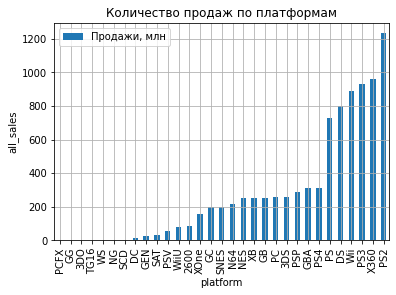

In [25]:
games_platform_sales.sort_values('all_sales').plot(kind='bar', grid = True,title = 'Количество продаж по платформам',ylabel = 'all_sales');
plt.legend(['Продажи, млн']);

Я выбрала первые шести платформ, поскольку можно заметить, что разница между 5 и 6 платформой, не такая большая, по сравнению с разницей между 6 и 7.

In [26]:
games_platform_sales.head(6)

,all_sales
platform,
2600,86.48
3DO,0.10
3DS,257.81
DC,15.95
DS,802.78
GB,254.43


In [27]:
platform_1 ='PS2'
games_ps2 = pd.pivot_table(games.query('platform == @platform_1'), index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')

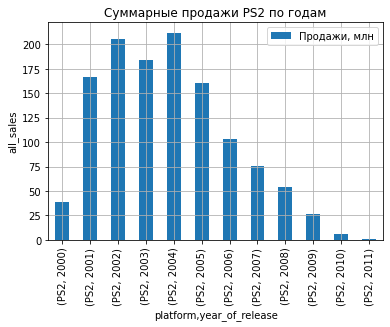

In [28]:
games_ps2.plot(kind='bar', grid = True,title = 'Суммарные продажи PS2 по годам', ylabel = 'all_sales');
plt.legend(['Продажи, млн']);

In [29]:
platform_2 ='X360'
games_x369 = pd.pivot_table(games.query('platform == @platform_2'), index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')

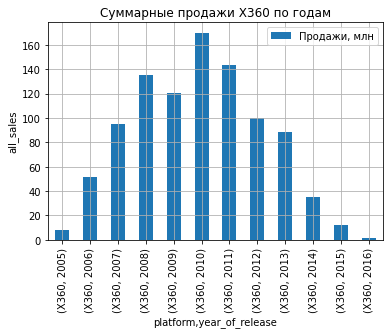

In [30]:
games_x369.plot(kind='bar', grid = True,title = 'Суммарные продажи X360 по годам', ylabel = 'all_sales');
plt.legend(['Продажи, млн']);

In [31]:
platform_3 ='PS3'
games_ps3 = pd.pivot_table(games.query('platform == @platform_3'), index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')

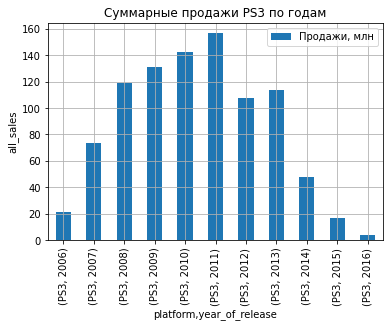

In [32]:
games_ps3.plot(kind='bar', grid = True,title = 'Суммарные продажи PS3 по годам', ylabel = 'all_sales');
plt.legend(['Продажи, млн']);

In [33]:
platform_4 ='Wii'
games_wii = pd.pivot_table(games.query('platform == @platform_4'), index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')

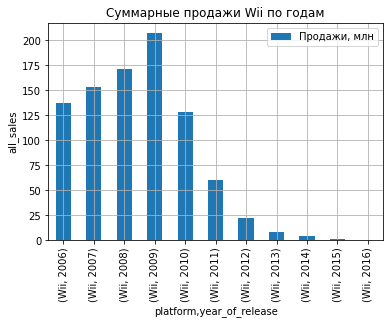

In [34]:
games_wii.plot(kind='bar', grid = True,title = 'Суммарные продажи Wii по годам', ylabel = 'all_sales');
plt.legend(['Продажи, млн']);

In [35]:
platform_5 ='DS'
games_ds = pd.pivot_table(games.query('platform == @platform_5'), index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')

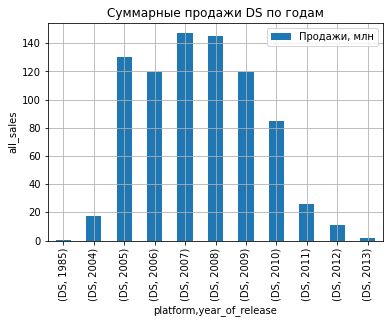

In [36]:
games_ds.plot(kind='bar', grid = True,title = 'Суммарные продажи DS по годам', ylabel = 'all_sales');
plt.legend(['Продажи, млн']);

In [37]:
platform_6 ='PS'
games_ps = pd.pivot_table(games.query('platform == @platform_6'), index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')

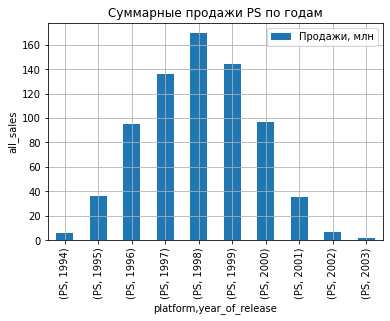

In [38]:
games_ps.plot(kind='bar', grid = True,title = 'Суммарные продажи PS по годам', ylabel = 'all_sales');
plt.legend(['Продажи, млн']);

Можно заметить, что примерно 6-8 лет нужно для появления новой платформы, например PS регулярно выпускает новые платформв и старые постепенно перестают польоваться популярностью.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. ###

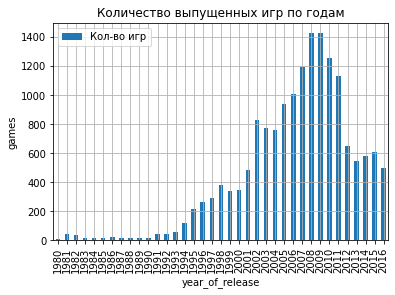

In [39]:
games.groupby('year_of_release')['name'].count().plot(kind='bar', grid = True,title = 'Количество выпущенных игр по годам', ylabel = 'games');
plt.legend(['Кол-во игр']);

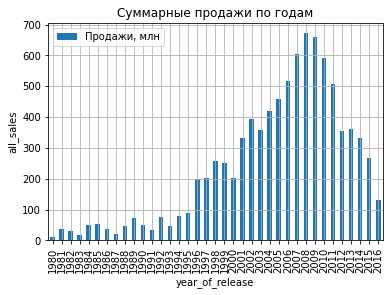

In [40]:
games.groupby('year_of_release')['all_sales'].sum().plot(kind='bar', grid = True,title = 'Суммарные продажи по годам', ylabel = 'all_sales');
plt.legend(['Продажи, млн']);

Если посмотреть на график, то можно заметить что игры выпускались как бы "пятелетками", если мы возьмем актуальный период с 2013 года, то 2017 год станет 5 годом в нашей пятелетке, поэтому **актуальный переод будет 2013-2016 года**.

In [41]:
actual_games = games.loc[games['year_of_release']>=2013,:]

In [42]:
actual_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_ESRB,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_ESRB,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [43]:
actual_games.groupby('platform').sum().sort_values('all_sales', ascending = False)['all_sales']

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: all_sales, dtype: float64

Платформами, которые лидируют по продажамd в актуальный период, являются: 
- PS4     
- PS3     
- XOne    
- 3DS     
- X360 

Если посмотреть на данные до актуализации, то можно заметить что из них только **X360** остается актуальной, а все остальные платформы представили новые версии.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат ###

In [44]:
act_platform_1 ='PS4'
act_games_ps4 = pd.pivot_table(actual_games.query('platform == @act_platform_1'), index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')

In [45]:
act_games_ps4

all_sales
platform year_of_release           
PS4      2013                 25.99
         2014                100.00
         2015                118.90
         2016                 69.25

In [46]:
act_platform_2 ='PS3'
act_games_ps3 = pd.pivot_table(actual_games.query('platform == @act_platform_2'), index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')

In [47]:
act_games_ps3

all_sales
platform year_of_release           
PS3      2013                113.25
         2014                 47.76
         2015                 16.82
         2016                  3.60

In [48]:
act_platform_3 ='XOne'
act_games_xone = pd.pivot_table(actual_games.query('platform == @act_platform_3'), index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')

In [49]:
act_games_xone

all_sales
platform year_of_release           
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

In [50]:
act_platform_4 ='3DS'
act_games_3ds = pd.pivot_table(actual_games.query('platform == @act_platform_4'), index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')

In [51]:
act_games_3ds

all_sales
platform year_of_release           
3DS      2013                 56.57
         2014                 43.76
         2015                 27.78
         2016                 15.14

In [52]:
act_platform_5 ='X360'
act_games_x360 = pd.pivot_table(actual_games.query('platform == @act_platform_5'), index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')

In [53]:
act_games_x360

all_sales
platform year_of_release           
X360     2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52

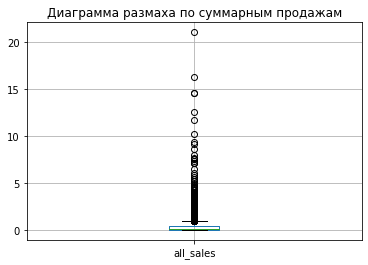

In [54]:
actual_games.boxplot(column = 'all_sales');
actual_games['all_sales'].describe()
plt.title('Диаграмма размаха по суммарным продажам');

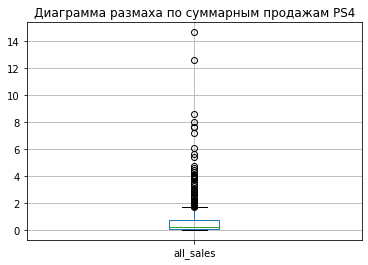

In [55]:
actual_games[actual_games['platform'] == 'PS4'].boxplot(column = 'all_sales');
plt.title('Диаграмма размаха по суммарным продажам PS4');

In [56]:
actual_games[actual_games['platform'] == 'PS4']['all_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: all_sales, dtype: float64

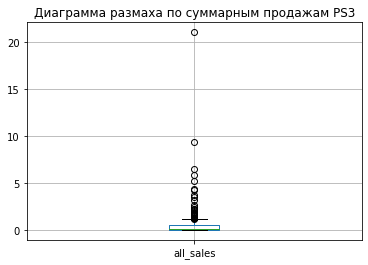

In [57]:
actual_games[actual_games['platform'] == 'PS3'].boxplot(column = 'all_sales');
actual_games[actual_games['platform'] == 'PS3']['all_sales'].describe()
plt.title('Диаграмма размаха по суммарным продажам PS3');

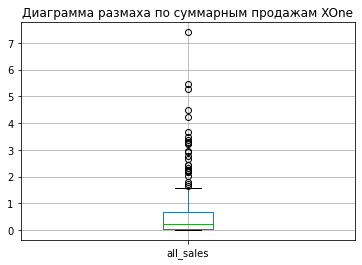

In [58]:
actual_games[actual_games['platform'] == 'XOne'].boxplot(column = 'all_sales');
actual_games[actual_games['platform'] == 'XOne']['all_sales'].describe()
plt.title('Диаграмма размаха по суммарным продажам XOne');

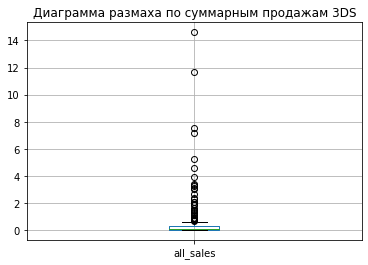

In [59]:
actual_games[actual_games['platform'] == '3DS'].boxplot(column = 'all_sales');
actual_games[actual_games['platform'] == '3DS']['all_sales'].describe()
plt.title('Диаграмма размаха по суммарным продажам 3DS');

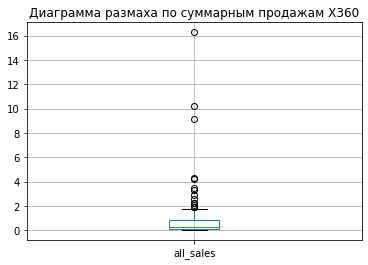

In [60]:
actual_games[actual_games['platform'] == 'X360'].boxplot(column = 'all_sales');
actual_games[actual_games['platform'] == 'X360']['all_sales'].describe()
plt.title('Диаграмма размаха по суммарным продажам X360');

In [61]:
act_games_top_5 = actual_games[(actual_games['platform'] == 'X360')|(actual_games['platform'] == '3DS')|(actual_games['platform'] == 'XOne')|(actual_games['platform'] == 'PS3')|(actual_games['platform'] == 'PS4')][['platform','all_sales']]


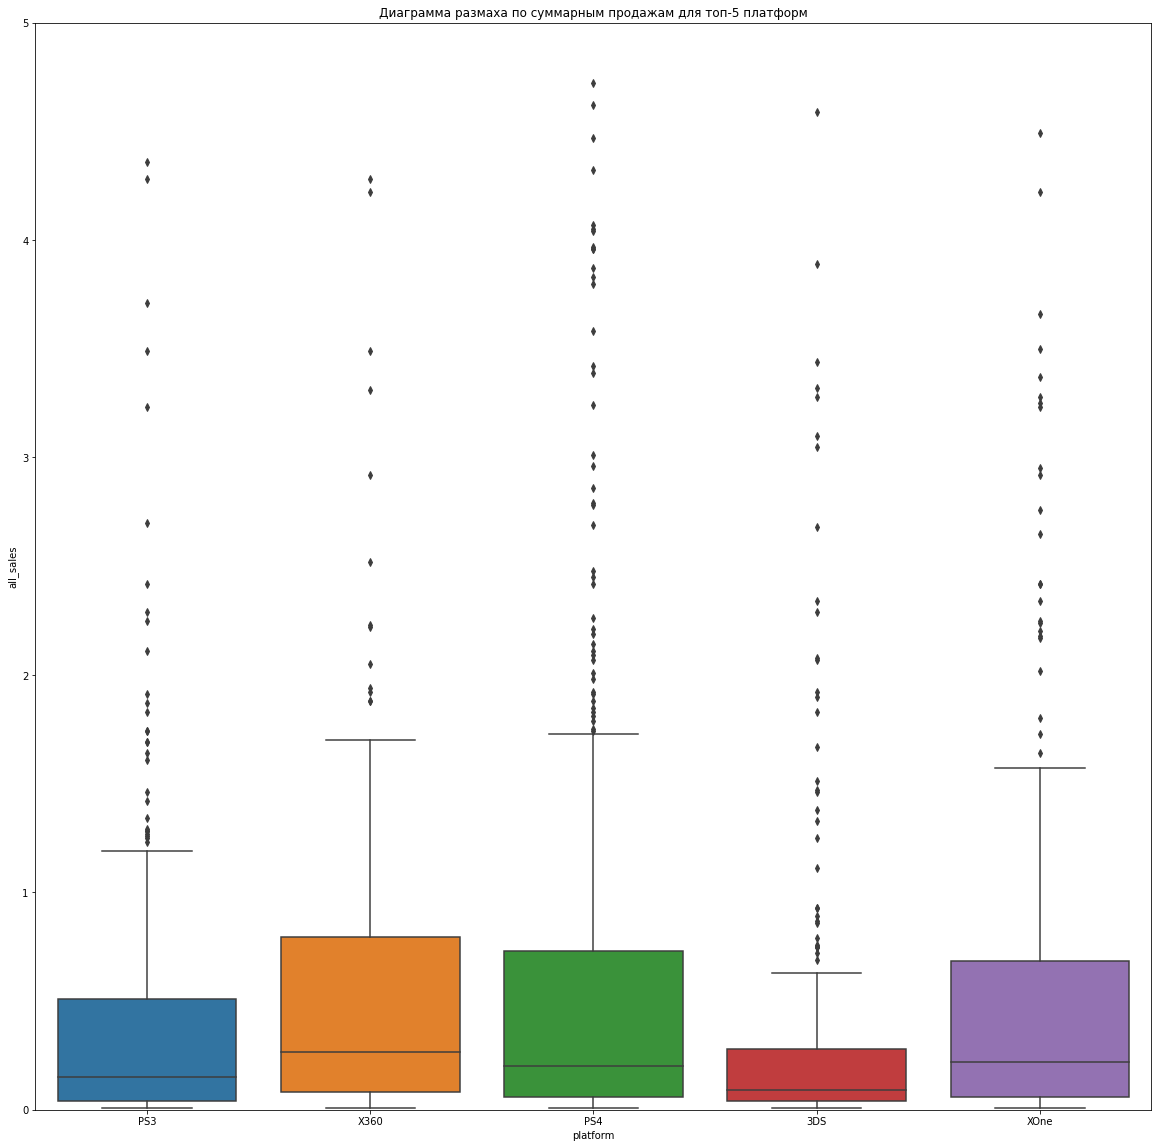

In [62]:
plt.figure(figsize=(20, 20));

sns.boxplot(x='platform', y='all_sales', data=act_games_top_5);
plt.ylim(0,5);
plt.title('Диаграмма размаха по суммарным продажам для топ-5 платформ');

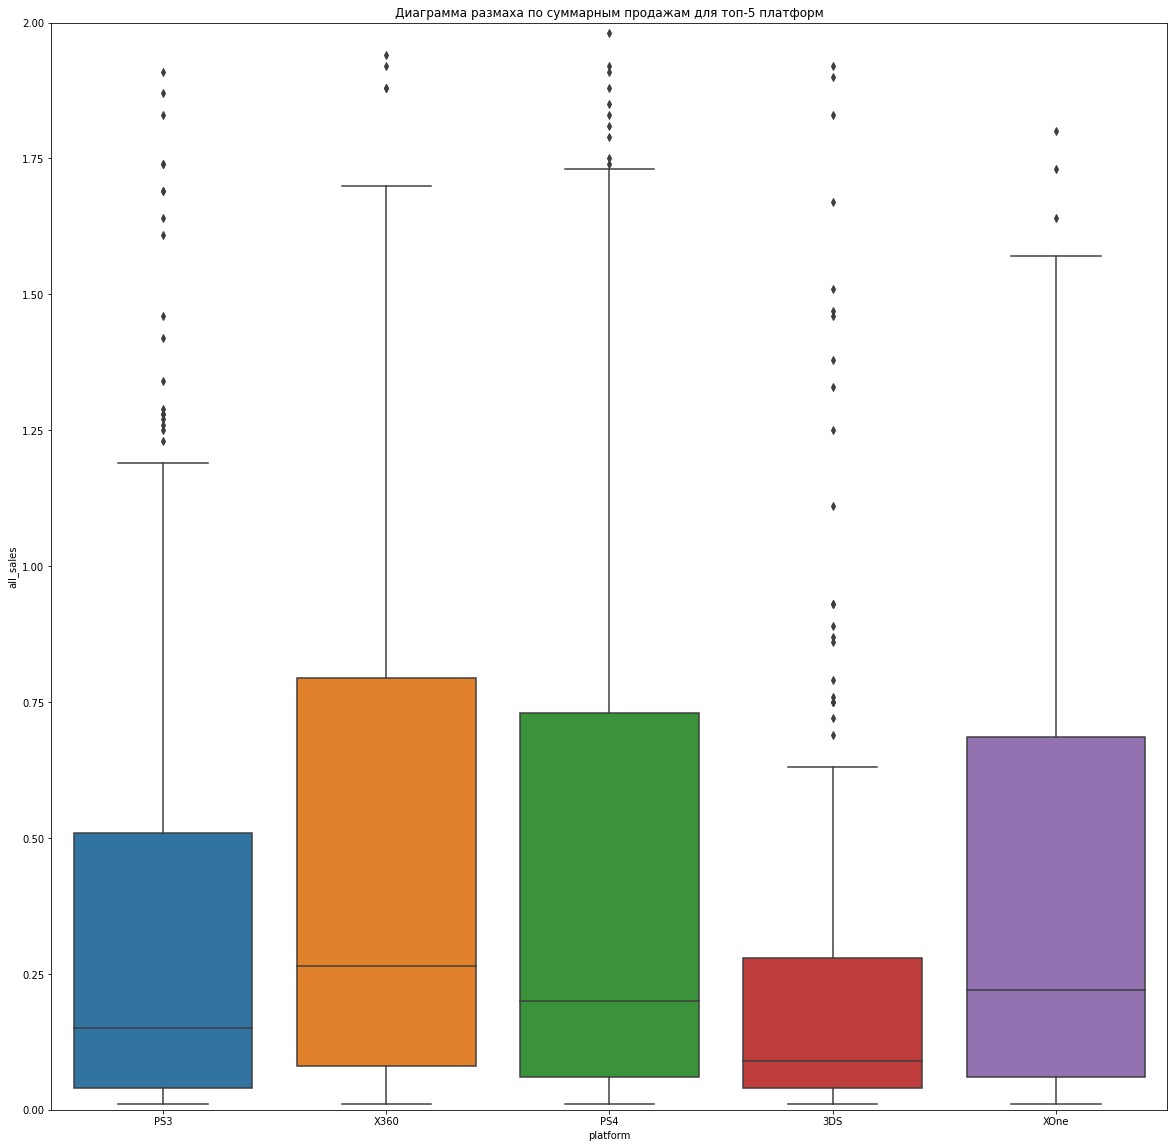

In [63]:
plt.figure(figsize=(20, 20));

sns.boxplot(x='platform', y='all_sales', data=act_games_top_5);
plt.ylim(0,2);
plt.title('Диаграмма размаха по суммарным продажам для топ-5 платформ');

- медиана по топ-5 не превышает 0,25 млн долларов прибыли за игру.
- верхнии границы (после которых уже аномалия): 
    - PS4 1.75 млн
    - PS3 1.2 млн
    - X360 1.7 млн
    - 3DS 0.7 млн
    - XOne 1.6 млн

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. ###

In [64]:
ps4_actual_games = actual_games[actual_games['platform'] == 'PS4'][['critic_score', 'user_score', 'all_sales']]

In [65]:
ps4_actual_games.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
all_sales,0.406568,-0.031957,1.000000


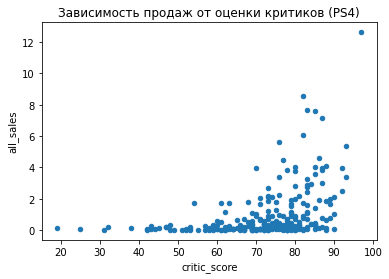

In [66]:
ps4_actual_games.plot(kind='scatter', x = 'critic_score', y = 'all_sales', title = 'Зависимость продаж от оценки критиков (PS4)');

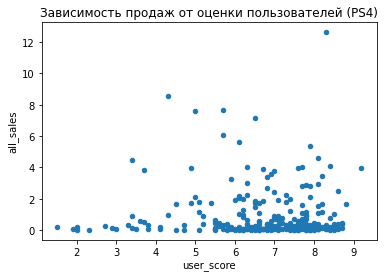

In [67]:
ps4_actual_games.plot(kind='scatter', x = 'user_score', y = 'all_sales', title = 'Зависимость продаж от оценки пользователей (PS4)');

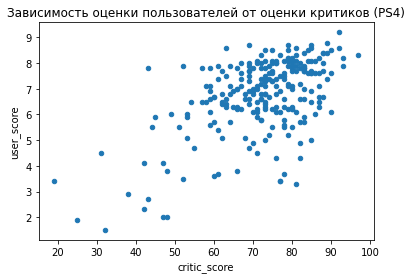

In [68]:
ps4_actual_games.plot(kind='scatter', x = 'critic_score', y = 'user_score', title = 'Зависимость оценки пользователей от оценки критиков (PS4)');

Для **PS4**: На продажи вляют оценки критиков (и то не очень сильно), оценки пользователей на продажи никак не влияют. Можно заметить, что есть зависимоть оценки пользователя от оценки критика.

**PS3**

In [69]:
ps3_actual_games = actual_games[actual_games['platform'] == 'PS3'][['critic_score', 'user_score', 'all_sales']]

In [70]:
ps3_actual_games.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.599920,0.334285
user_score,0.599920,1.000000,0.002394
all_sales,0.334285,0.002394,1.000000


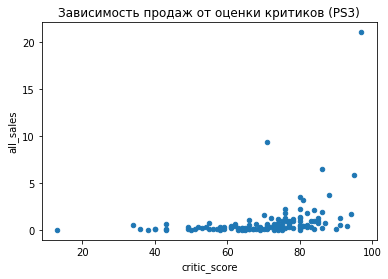

In [71]:
ps3_actual_games.plot(kind='scatter', x = 'critic_score', y = 'all_sales', title = 'Зависимость продаж от оценки критиков (PS3)');

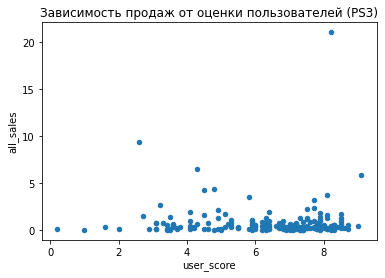

In [72]:
ps3_actual_games.plot(kind='scatter', x = 'user_score', y = 'all_sales', title = 'Зависимость продаж от оценки пользователей (PS3)');

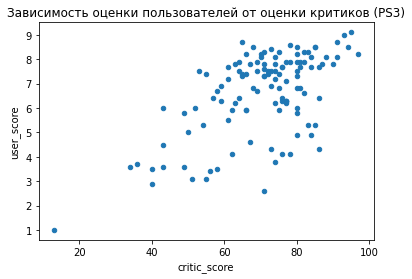

In [73]:
ps3_actual_games.plot(kind='scatter', x = 'critic_score', y = 'user_score', title = 'Зависимость оценки пользователей от оценки критиков (PS3)');

**XOne**

In [74]:
xone_actual_games = actual_games[actual_games['platform'] == 'XOne'][['critic_score', 'user_score', 'all_sales']]

In [75]:
xone_actual_games.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
all_sales,0.416998,-0.068925,1.000000


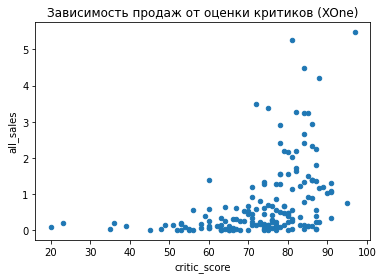

In [76]:
xone_actual_games.plot(kind='scatter', x = 'critic_score', y = 'all_sales', title = 'Зависимость продаж от оценки критиков (XOne)');

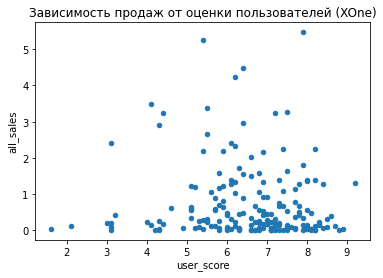

In [77]:
xone_actual_games.plot(kind='scatter', x = 'user_score', y = 'all_sales', title = 'Зависимость продаж от оценки пользователей (XOne)');

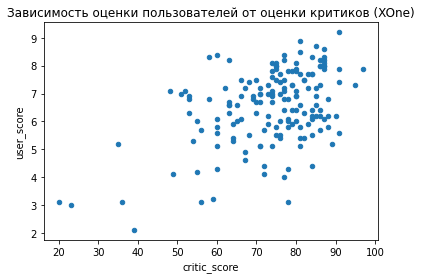

In [78]:
xone_actual_games.plot(kind='scatter', x = 'critic_score', y = 'user_score', title = 'Зависимость оценки пользователей от оценки критиков (XOne)');

**3DS**

In [79]:
ds3_actual_games = actual_games[actual_games['platform'] == '3DS'][['critic_score', 'user_score', 'all_sales']]

In [80]:
ds3_actual_games.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.769536,0.357057
user_score,0.769536,1.000000,0.241504
all_sales,0.357057,0.241504,1.000000


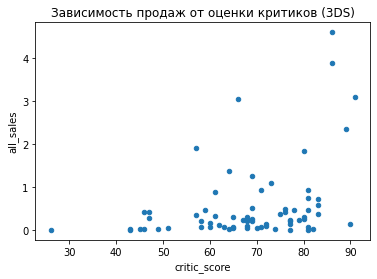

In [81]:
ds3_actual_games.plot(kind='scatter', x = 'critic_score', y = 'all_sales', title = 'Зависимость продаж от оценки критиков (3DS)');

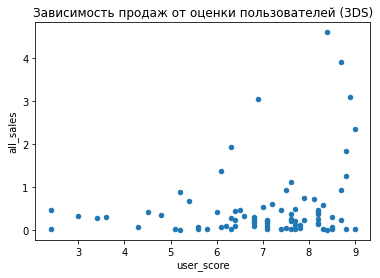

In [82]:
ds3_actual_games.plot(kind='scatter', x = 'user_score', y = 'all_sales', title = 'Зависимость продаж от оценки пользователей (3DS)');

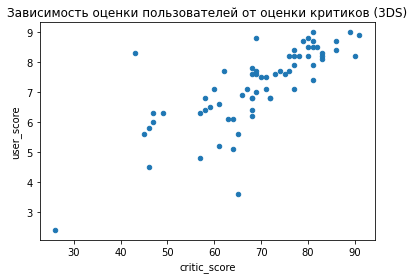

In [83]:
ds3_actual_games.plot(kind='scatter', x = 'critic_score', y = 'user_score', title = 'Зависимость оценки пользователей от оценки критиков (3DS)');

**X360**

In [84]:
x360_actual_games = actual_games[actual_games['platform'] == 'X360'][['critic_score', 'user_score', 'all_sales']]

In [85]:
x360_actual_games.corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.011742
all_sales,0.350345,-0.011742,1.000000


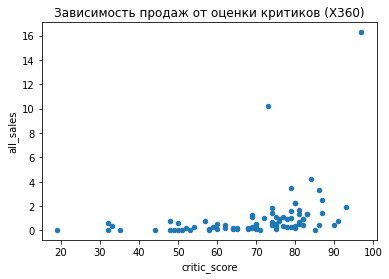

In [86]:
x360_actual_games.plot(kind='scatter', x = 'critic_score', y = 'all_sales', title = 'Зависимость продаж от оценки критиков (X360)');

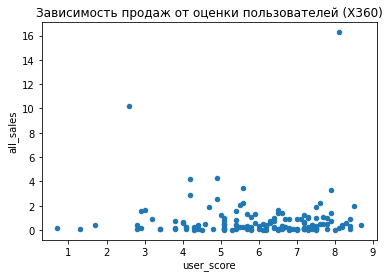

In [87]:
x360_actual_games.plot(kind='scatter', x = 'user_score', y = 'all_sales', title = 'Зависимость продаж от оценки пользователей (X360)');

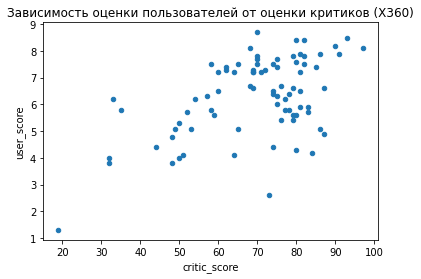

In [88]:
x360_actual_games.plot(kind='scatter', x = 'critic_score', y = 'user_score', title = 'Зависимость оценки пользователей от оценки критиков (X360)');

По остальным данным также можно заметить, что продажи не зависят ни от оценки пользователя, ни от оценки критиков, зато можно заметить, что оценки пользователя зависят от оценки критиков.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? ###

In [89]:
games.year_of_release.min()

1980

In [90]:
act_games_genre_sales = pd.pivot_table(actual_games, index=['genre'],values='all_sales', aggfunc='sum')
act_games_genre_sales = act_games_genre_sales.sort_values('all_sales', ascending = False)

In [91]:
act_games_genre_sales

,all_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


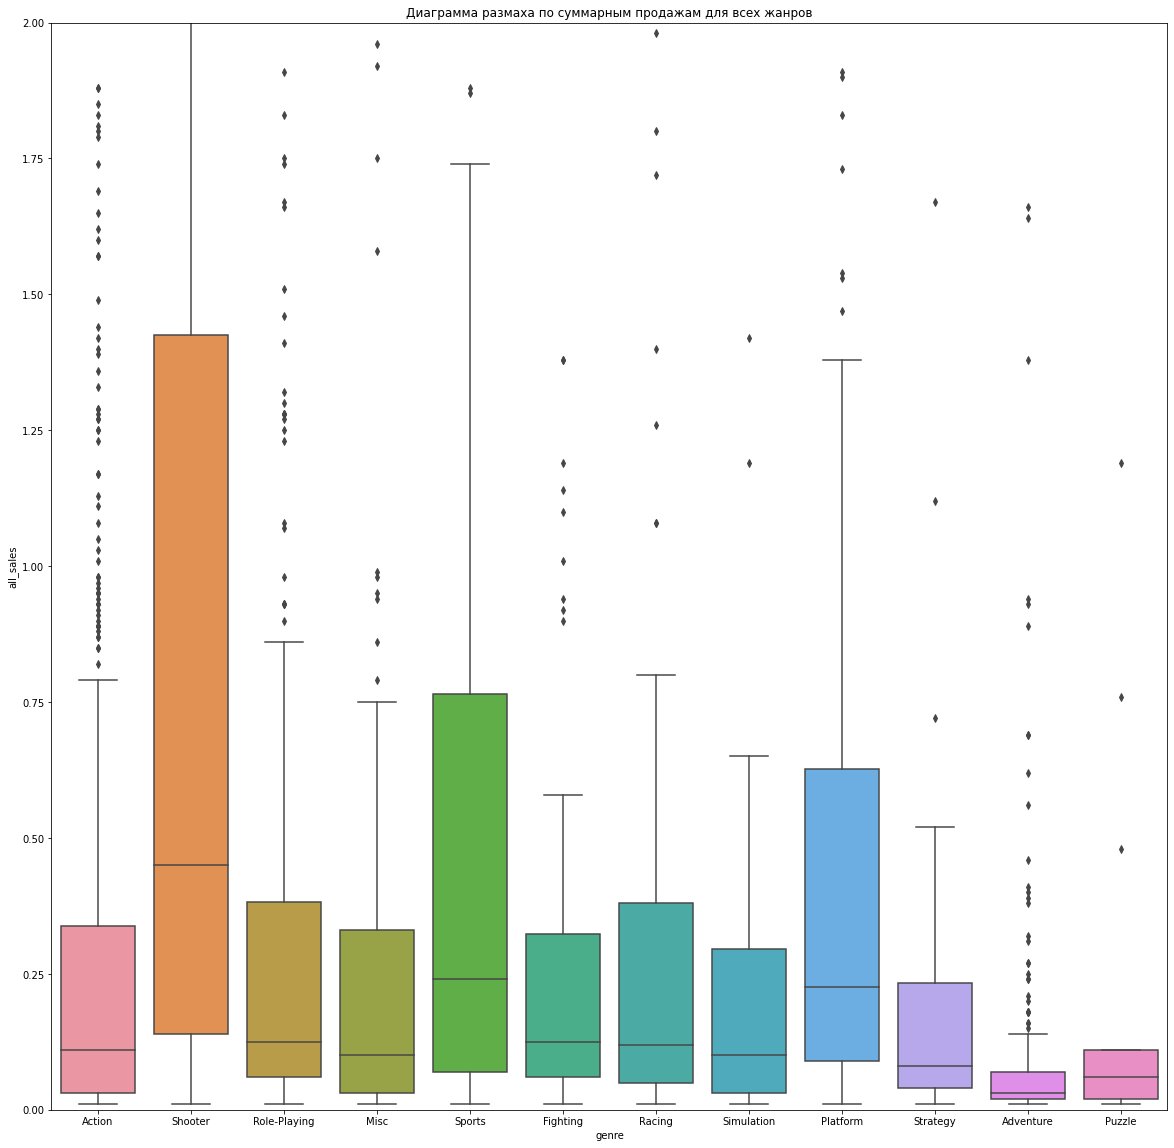

In [92]:
act_games_top_genre = actual_games[['genre','all_sales']]
plt.figure(figsize=(20, 20));
sns.boxplot(x='genre', y='all_sales', data=act_games_top_genre);
plt.ylim(0,2);
plt.title('Диаграмма размаха по суммарным продажам для всех жанров');

По диаграмме размаха, можно заметить, что самые прибыльные жанры: **Shooter**, **Sports**, **Platform** (их медианные продажи самые высокие)

## Составьте портрет пользователя каждого региона ##


Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?m

In [93]:
na_games_sales = actual_games.loc[actual_games['na_sales']>0,:]
eu_games_sales = actual_games.loc[actual_games['eu_sales']>0,:]
jp_games_sales = actual_games.loc[actual_games['jp_sales']>0,:]

In [94]:
na_sales_platform = na_games_sales[['platform', 'all_sales', 'na_sales']]
eu_sales_platform = eu_games_sales[['platform', 'all_sales', 'eu_sales']]
jp_sales_platform = jp_games_sales[['platform', 'all_sales', 'jp_sales']]


In [95]:
na_sales_platform=na_sales_platform.groupby('platform').sum()

In [96]:
na_sales_platform['conv'] = na_sales_platform['na_sales']/na_sales_platform['all_sales']

In [97]:
na_sales_platform.sort_values('na_sales', ascending = False)

,all_sales,na_sales,conv
platform,,,
PS4,307.48,108.74,0.353649
XOne,159.00,93.12,0.585660
X360,136.49,81.66,0.598286
PS3,171.08,63.50,0.371171
3DS,112.39,38.20,0.339888
WiiU,63.29,29.21,0.461526
PC,33.23,11.11,0.334336
Wii,13.00,6.56,0.504615
PSV,19.18,5.04,0.262774


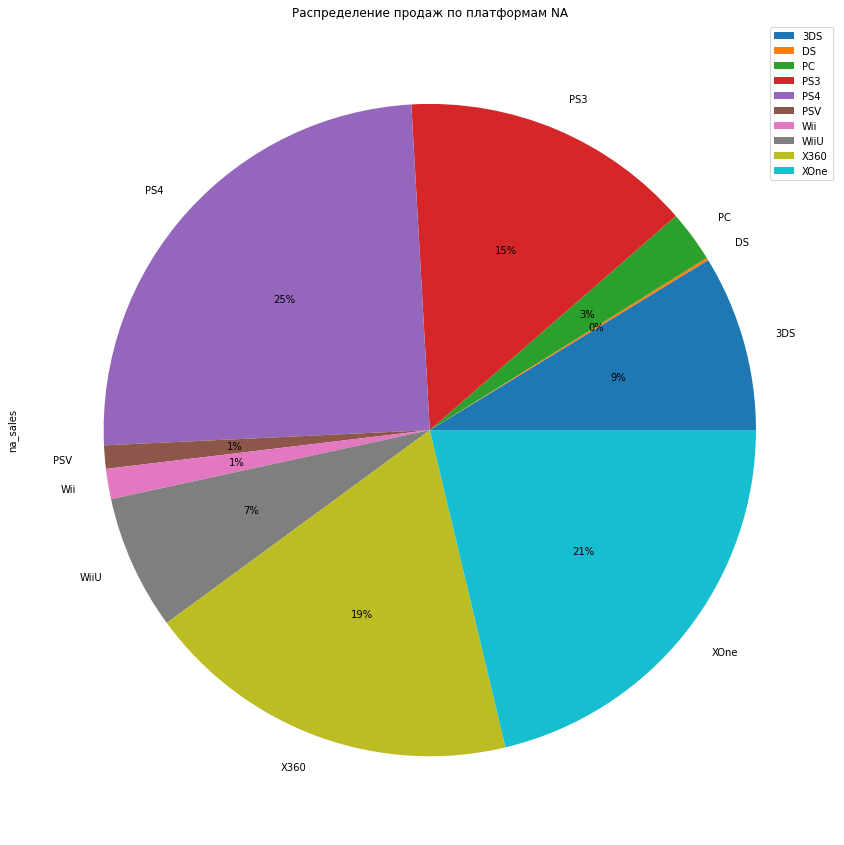

In [98]:
na_sales_platform.plot.pie(y='na_sales', figsize=(15, 15), autopct='%1.0f%%', title ='Распределение продаж по платформам NA');

In [99]:
eu_sales_platform=eu_sales_platform.groupby('platform').sum()

In [100]:
eu_sales_platform['conv'] = eu_sales_platform['eu_sales']/eu_sales_platform['all_sales']

In [101]:
eu_sales_platform.sort_values('eu_sales', ascending = False)

,all_sales,eu_sales,conv
platform,,,
PS4,306.41,141.09,0.460461
PS3,168.45,67.81,0.402553
XOne,158.66,51.59,0.325161
X360,134.40,42.52,0.316369
3DS,110.06,30.96,0.281301
PC,39.35,25.36,0.644473
WiiU,63.05,19.85,0.314830
PSV,19.52,6.10,0.312500
Wii,13.61,5.93,0.435709


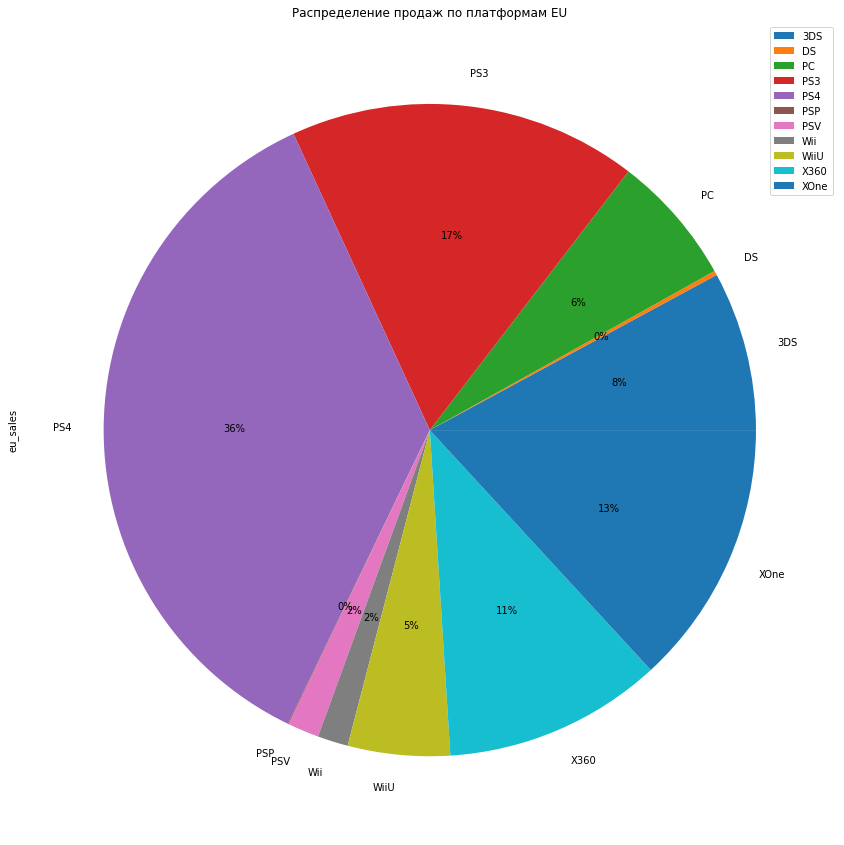

In [102]:
eu_sales_platform.plot.pie(y='eu_sales', figsize=(15, 15), autopct='%1.0f%%',title ='Распределение продаж по платформам EU');

In [103]:
jp_sales_platform=jp_sales_platform.groupby('platform').sum()

In [104]:
jp_sales_platform['conv'] = jp_sales_platform['jp_sales']/jp_sales_platform['all_sales']

In [105]:
jp_sales_platform.sort_values('jp_sales', ascending = False)

,all_sales,jp_sales,conv
platform,,,
3DS,136.09,67.81,0.498273
PS3,144.33,23.35,0.161782
PSV,28.25,18.59,0.658053
PS4,264.86,15.96,0.060258
WiiU,53.66,10.88,0.202758
PSP,3.31,3.29,0.993958
X360,64.24,0.51,0.007939
XOne,47.86,0.34,0.007104
Wii,0.05,0.05,1.000000


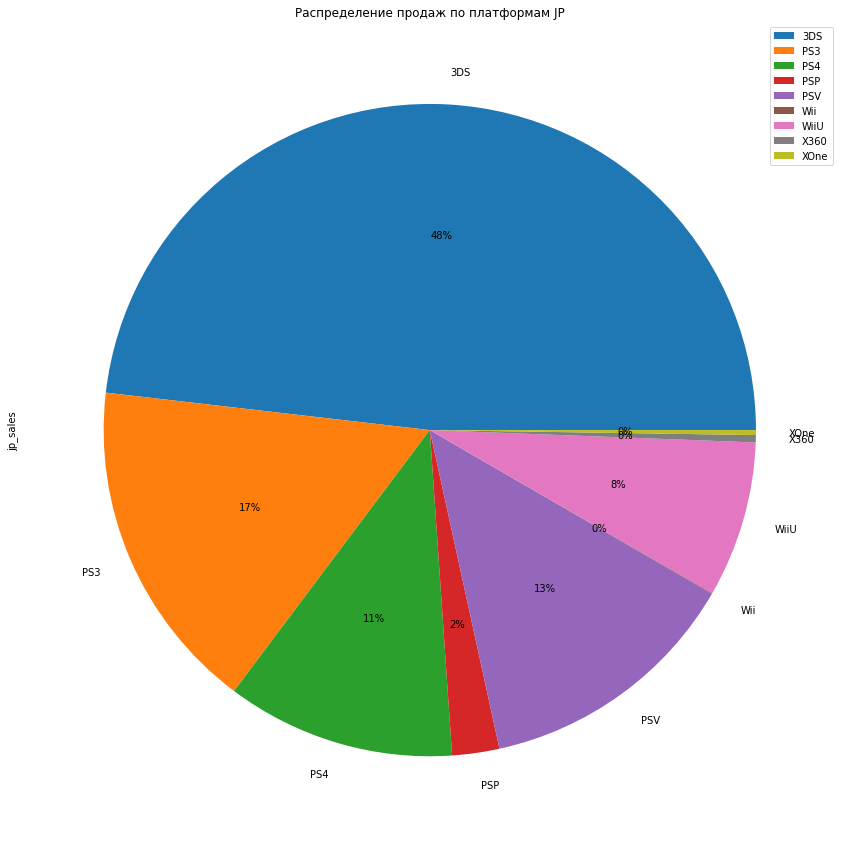

In [106]:
jp_sales_platform.plot.pie(y='jp_sales', figsize=(15, 15), autopct='%1.0f%%', title ='Распределение продаж по платформам JP');

In [107]:
na_sales_genre = pd.pivot_table(na_games_sales,index=['genre'],values=['na_sales'], aggfunc='sum' )

In [108]:
na_sales_genre.sort_values('na_sales', ascending = False)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


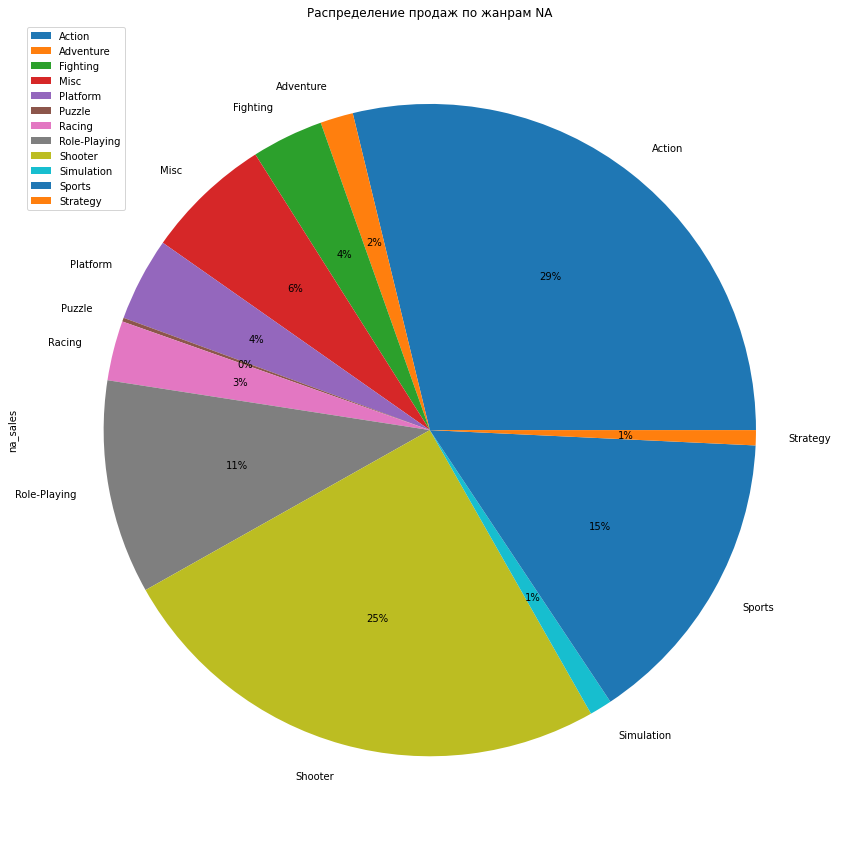

In [109]:
na_sales_genre.plot.pie(y='na_sales', figsize=(15, 15), autopct='%1.0f%%', title ='Распределение продаж по жанрам NA');

In [110]:
eu_sales_genre = pd.pivot_table(eu_games_sales,index=['genre'],values=['eu_sales'], aggfunc='sum' )

In [111]:
eu_sales_genre.sort_values('eu_sales', ascending = False)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


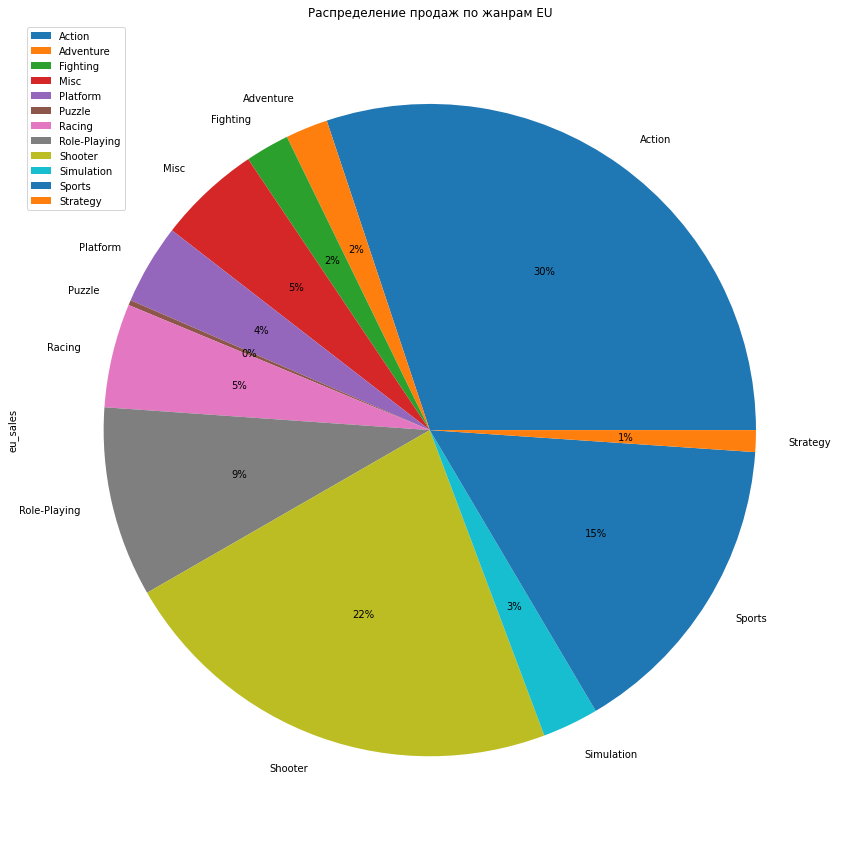

In [112]:
eu_sales_genre.plot.pie(y='eu_sales', figsize=(15, 15), autopct='%1.0f%%', title ='Распределение продаж по жанрам EU');

In [113]:
jp_sales_genre = pd.pivot_table(jp_games_sales,index=['genre'],values=['jp_sales'], aggfunc='sum' )

In [114]:
jp_sales_genre.sort_values('jp_sales', ascending = False)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


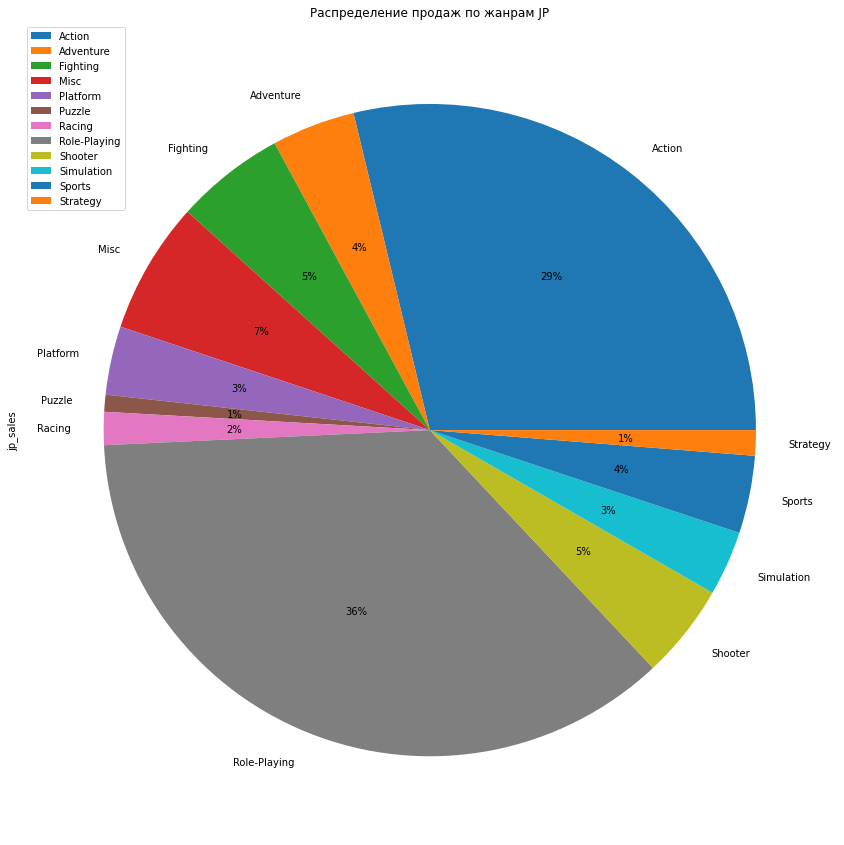

In [115]:
jp_sales_genre.plot.pie(y='jp_sales', figsize=(15, 15), autopct='%1.0f%%', title ='Распределение продаж по жанрам JP');

In [116]:
jp_sales_rating = pd.pivot_table(jp_games_sales,index=['rating'],values=['jp_sales', ], aggfunc='sum' )

In [117]:
jp_sales_rating.sort_values('jp_sales', ascending = False)

,jp_sales
rating,
no_ESRB,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


In [118]:
eu_sales_rating = pd.pivot_table(eu_games_sales,index=['rating'],values=['eu_sales', ], aggfunc='sum' )

In [119]:
eu_sales_rating.sort_values('eu_sales', ascending = False)

,eu_sales
rating,
M,145.32
E,83.36
no_ESRB,78.91
E10+,42.69
T,41.95


In [120]:
na_sales_rating = pd.pivot_table(na_games_sales,index=['rating'],values=['na_sales', ], aggfunc='sum' )

In [121]:
na_sales_rating.sort_values('na_sales', ascending = False)

,na_sales
rating,
M,165.21
no_ESRB,89.42
E,79.05
E10+,54.24
T,49.79


Портрет пользователя из NA (Северная Америка): 
- самые популярные платформы PS4, XOne, X360, PS3 + на Америку приходятся почти половина продаж всех игр на этих платформах;
- играют в основнм в игры жанра : action, sports, shooter;
- самые популярные рейтинги E ("Для всех"), M ("Для взрослых"), в основном играют взрослые.

Портрет пользователя из EU (Европа):

- самые популярные платформы PS4, XOne, PS3, + на Европу приходятся почти 30% продаж всех игр на этих платформах;
- играют в основнм в игры жанра : action, sports, shooter;
- самые популярные рейтинги E ("Для всех"), M ("Для взрослых"), самые активные игроки взрослые.

Портрет пользователя из JP (Япония):

- самые популярные платформы 3DS, PS3;
- играют в основнм в игры жанра : role-playing, action;
- в основном в Японии играют в свои игры, это видно по сколько на первом месте по продажам рейтинг **no_ESRB** (в Японии свой рейтинг, не ERSB), в остальном самые популярные рейтинги E ("Для всех"), T ("Подросткам"), в основном играют дети-подростки до 17 лет.

## Проверьте гипотезы ##


- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.

Нулевая гипотеза $H_0$ : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
Альтернативная гипотеза $H_1$ : Средние пользовательские рейтинги платформ Xbox One и PC разные.


Для оценки гипотезы будем применять t-test. Критерий Стьюдента (t-тест) позволит нам сравнивать средние значения двух выборок и на основе результатов теста делать заключение о том, различаются ли они друг от друга статистически или нет.

В результате теста можем получить:  "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу".

Ответ "Отвергаем нулевую гипотезу" означает, что наше предположение о равенстве пользовательских рейтингов ошибочно.

In [122]:
xone_games_usr_score = actual_games.loc[(actual_games['platform'] == 'XOne')&(actual_games['user_score']>0), 'user_score']

In [123]:
pc_games_usr_score = actual_games.loc[(actual_games['platform'] == 'PC')&(actual_games['user_score']>0), 'user_score']

In [124]:
alpha = .05

results = st.ttest_ind(xone_games_usr_score, pc_games_usr_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
print('Средний пользовательский рейтинг по платформе XOne', xone_games_usr_score.mean())    
print('Средний пользовательский рейтинг по платформе PC', pc_games_usr_score.mean())    


p-значение: 0.14012765210016784
Не получилось отвергнуть нулевую гипотезу
Средний пользовательский рейтинг по платформе XOne 6.521428
Средний пользовательский рейтинг по платформе PC 6.2696776


Т.е. мы получили, что средние рейтинги платформ Xbox One и PC разные.


    
Нулевая гипотеза $H_0$ : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;

Алтернативная гипотеза $H_1$ : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Для оценки гипотезы будем применять t-test. Критерий Стьюдента (t-тест) позволит нам сравнивать средние значения двух выборок и на основе результатов теста делать заключение о том, различаются ли они друг от друга статистически или нет.

В результате теста можем получить: "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу".

Ответ "Отвергаем нулевую гипотезу" означает, что наше предположение о равенстве пользовательских рейтингов ошибочно.

In [125]:
act_games_usr_score = actual_games.loc[(actual_games['genre'] == 'Action')&(actual_games['user_score']>0), 'user_score']

In [126]:
sp_games_usr_score = actual_games.loc[(actual_games['genre'] == 'Sports')&(actual_games['user_score']>0), 'user_score']

In [127]:
results_p = st.ttest_ind(act_games_usr_score, sp_games_usr_score)

print('p-значение:', results_p.pvalue)

if results_p.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print('Средний пользовательский рейтинг и по жанру Action', act_games_usr_score.mean())    
print('Средний пользовательский рейтинг и по жанру Sports', sp_games_usr_score.mean())    

    

p-значение: 1.0517772011408453e-27
Отвергаем нулевую гипотезу
Средний пользовательский рейтинг и по жанру Action 6.837532
Средний пользовательский рейтинг и по жанру Sports 5.238125


Получили, что наше предположение о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные не получилось отвергнуть.

## Общий вывод ##


Было выполнено:

- Просмотрена таблица, выявлены аномалии и пропущенные значения.
- Проведена предобработка таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
- Проведен анализ по данным и подготовлены актуальные данные.
- Составлены портреты пользователей для купных регионов продаж.
- Выполнены проверки гипотез.



План на 2017 год:
    
- Наиболее актуальные платформы: **PS4, PS3, XOne, 3DS, X360**. Можно увеличить католог игр на этих платформах, и уменьшить на количество игр на устаревающих платформах.
- Развивать соцсети, в основном в игры играют подростки, которые все узнают из интернета. Так же  на домашней странице сайта можно сделать Топы по жанрам или популярности.
- Развивать рекламные кампании следующим образом:
   - в США: игры жанра **Action**, **Shooter** на платформах **PS4** и **XOne**;
   - в Европе: игры жанра **Action**, **Shooter** на платформах **PS4** и **PS3**;
   - в Японии: игры жанра **Action**, **Role-Playing** на платформе **3DS** (почти половина Японии пользуется данной платформой);